# Housing prices in Ames, Iwoa (dataset downloaded from Kaggle)

We first import the libraries:

In [1]:
#importing main libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We then load the data (training set into the housing variable and the validation set into validation_set):

In [131]:
housing = pd.read_csv('./../1 - Dados Originais/train.csv')
validation_set = pd.read_csv('./../1 - Dados Originais/test.csv')

We now have a check some entries and the type of the different attributes in the dataset (what are the categorical and the numerical ones?):

In [3]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

As we can see there are 38 are numerical attributes and 43 categorical ones, with a total of 81 attributes. Naturally some of the 35 integer attributes may be discrete. There are also 1460 entries in the training set. We can see that there are some attributes with a lot of missing instances (such as PoolQC, MiscFeature and Fence). Perhaps, we can throw some away in future steps? For now lets hold onto all the data.
Next, we call the describe function to probe the properties of the numerical attributes:

In [5]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We also want to probe for correlations between the numerical attributes and the target:

In [6]:
corr_matrix = housing.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [7]:
housing["YrSold"].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

We can see that there are some attributes that have a strong correlation with our target attribute, the Sale Price. Let's check the scatter matrix:

C:\Users\Caio\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


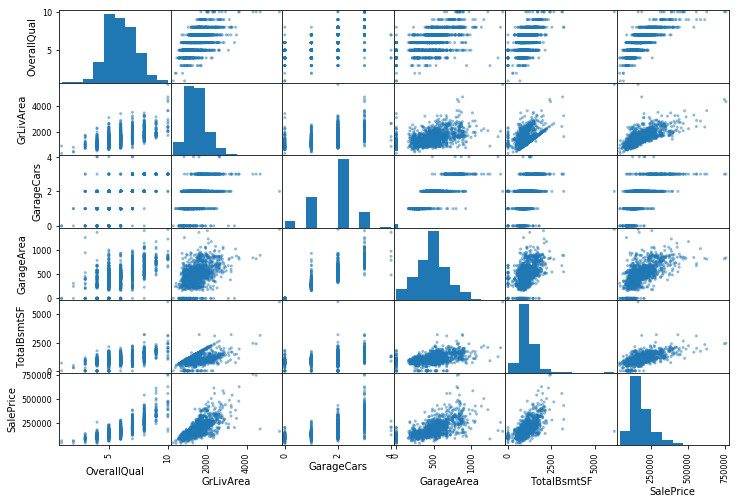

In [8]:
from pandas.tools.plotting import scatter_matrix
attributes = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','SalePrice']
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

Before we proceed, I will train some models with the current numerical attributes only and see how well they perform. First I make a copy of the training set and then I drop the categorical columns:

In [9]:
housing_num = housing.copy() #creates a copy of the training dataset

In [10]:
allcol = housing_num.columns
num = housing_num._get_numeric_data().columns
cat = list(set(allcol) - set(num)) #got a list of names with all categorical attributes

In [11]:
housing_num = housing_num.drop(cat, axis=1) #finally the number of attributes in this dataset is now 38, the number of numerical attributes in the original dataset
housing_num.columns.size

38

We now split the predictor and target attributes: 

In [12]:
housing_labels = housing_num['SalePrice'].copy()
housing_num = housing_num.drop('SalePrice', axis=1)

Here we import the models we will employ as well as cost/score functions:

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import FeatureUnion

In [14]:
imputer = Imputer(strategy='median')
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [15]:
X = imputer.transform(housing_num)
housing_num_df = pd.DataFrame(X, columns=housing_num.columns)

We now transform the DataFrames in numpy arrays:

In [16]:
housing_prep = housing_num_df.values
housing_prep_labels = housing_labels.values.reshape(-1,1)

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prep,housing_prep_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
scores = cross_val_score(lin_reg, housing_prep,housing_prep_labels,scoring = 'neg_mean_squared_error', cv=10)
lin_reg_rmse_scores = np.sqrt(-scores)

In [19]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

In [20]:
display_scores(lin_reg_rmse_scores)

Scores: [ 27938.70342533  29960.39193438  26808.21834256  41727.46299053
  40034.96054643  31646.32284844  30271.83195023  30207.22082169
  63969.97253671  29106.23354987]
Mean: 35167.1318946
Standard Deviation: 10692.3540361


There seems to be some models that are performing really poorly (take a look at the second last model!), so we will shuffle the instances and see if we can reduce this problem:

In [21]:
np.random.seed(42)
shuffle_indexes = np.random.permutation(len(housing_prep_labels))
shuf_housing_prep, shuf_housing_labels = housing_prep[shuffle_indexes], housing_prep_labels[shuffle_indexes]
lin_reg.fit(shuf_housing_prep,shuf_housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
scores = cross_val_score(lin_reg, shuf_housing_prep,shuf_housing_labels,scoring = 'neg_mean_squared_error', cv=10)
shuf_lin_reg_rmse_scores = np.sqrt(-scores)
display_scores(shuf_lin_reg_rmse_scores)

Scores: [ 39794.30830061  33917.81092214  28313.55011681  40905.68654548
  43686.70598824  63113.61068372  35371.60276011  24730.97263329
  26990.71630119  24722.23280281]
Mean: 36154.7197054
Standard Deviation: 11097.8132851


Well, its seems it actually got worse! Let's try other models!

In [23]:
# A descision tree model!
tree_reg = DecisionTreeRegressor()
tree_reg.fit(shuf_housing_prep,shuf_housing_labels)
scores = cross_val_score(tree_reg, shuf_housing_prep,shuf_housing_labels,scoring = 'neg_mean_squared_error', cv=10)
tree_reg_rmse_scores = np.sqrt(-scores)
display_scores(tree_reg_rmse_scores)

Scores: [ 34200.28588691  40775.10365172  38022.42262662  67537.22568444
  39936.73205577  38383.9066322   43303.59963596  42883.39383445
  33341.76424772  35866.19038156]
Mean: 41425.0624637
Standard Deviation: 9270.39927043


In [24]:
# A random forest regressor model!
forest_reg = RandomForestRegressor()
forest_reg.fit(shuf_housing_prep,shuf_housing_labels.ravel())
scores = cross_val_score(forest_reg, shuf_housing_prep,shuf_housing_labels.ravel(),scoring = 'neg_mean_squared_error', cv=10)
forest_reg_rmse_scores = np.sqrt(-scores)
display_scores(forest_reg_rmse_scores)

Scores: [ 30387.2907782   30635.54292113  21337.81324145  34273.24862584
  43260.17871855  41109.74120878  33514.6652352   28288.00250258
  27067.42698637  23169.13764816]
Mean: 31304.3047866
Standard Deviation: 6683.10626817


In [25]:
# A support vector machine regressor model!
svm_reg = SVR()
svm_reg.fit(shuf_housing_prep,shuf_housing_labels.ravel())
scores = cross_val_score(svm_reg, shuf_housing_prep,shuf_housing_labels.ravel(),scoring = 'neg_mean_squared_error', cv=10)
svm_reg_rmse_scores = np.sqrt(-scores)
display_scores(svm_reg_rmse_scores)

Scores: [ 97334.84883458  79300.11610582  77198.69635692  93286.31166699
  75192.36968867  77971.72380474  85848.55674982  75439.73688012
  73211.44293564  75355.1379786 ]
Mean: 81013.8941002
Standard Deviation: 7905.49472493


It seems the best method for the numerical part of the dataset is the random forest regressor. Aside from filling the numerical attributes with the median, we haven't performed any sort of cleaning nor manipulation. So let's do just that! And in order to make everything easier we will place these transformations on our pipeline. 






# Second part starts here






Let's make a copy of our training set:

In [26]:
housing2 = housing.copy()

Regarding the categorical attributes, there are basically two groups the ones which have categories that are basically grading that feature and the ones which don't. Therefore we have 3 different groups of attributes: numerical, 'grading' categorical and 'descriptive' categorical. Each group has to be treated separately:

In [107]:
grading_attributes = ['Street','Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','Functional','FireplaceQu','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']
desc_attributes = list(set(cat)-set(grading_attributes))
num = list(set(num)-set(['SalePrice']))
print(num, grading_attributes,desc_attributes)

['Fence', 'ExterCond', 'PoolQC', 'ExterQual', 'Functional', 'Street', 'BsmtFinType1', 'GarageQual', 'BsmtCond', 'Utilities', 'LandSlope', 'BsmtQual', 'BsmtFinType2', 'BsmtExposure', 'PavedDrive', 'CentralAir', 'GarageCond', 'HeatingQC', 'FireplaceQu'] ['Street', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Functional', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence'] ['SaleType', 'MSZoning', 'GarageFinish', 'KitchenQual', 'Condition2', 'GarageType', 'Neighborhood', 'LandContour', 'HouseStyle', 'LotConfig', 'RoofMatl', 'Condition1', 'Heating', 'Alley', 'Exterior1st', 'RoofStyle', 'Electrical', 'SaleCondition', 'MiscFeature', 'Foundation', 'Exterior2nd', 'MasVnrType', 'LotShape', 'BldgType']


Next, we set out to create a list of lists, where each one of the lists contains the values that are present in the columns. This will be important later on to assign numerical grades instead of words such as 'Excelent' or 'Poor'. This point will be made clear later on:

In [28]:
grdattr_grades = []
for el in grading_attributes:
    grdattr_grades += [list(housing2[el].unique())]
print(grdattr_grades)

[['Pave', 'Grvl'], ['AllPub', 'NoSeWa'], ['Gtl', 'Mod', 'Sev'], ['Gd', 'TA', 'Ex', 'Fa'], ['TA', 'Gd', 'Fa', 'Po', 'Ex'], ['Gd', 'TA', 'Ex', nan, 'Fa'], ['TA', 'Gd', nan, 'Fa', 'Po'], ['No', 'Gd', 'Mn', 'Av', nan], ['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], ['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], ['Ex', 'Gd', 'TA', 'Fa', 'Po'], ['Y', 'N'], ['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'], [nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], ['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], ['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], ['Y', 'N', 'P'], [nan, 'Ex', 'Fa', 'Gd'], [nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw']]


We then modify the list generated including the missing values which were not present in the columns but that appear in the description file, and we also modify the order of the values so that values that represent the best grades get the higher indices and the values that are associated with poor quality get bad grades. We did this manually since the number of attributes is not very large, but a better approach would be to read the description file and create this list directly from the values that are present there.

In [29]:
grdattr_grades = [['Grvl', 'Pave'], ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'], ['Sev','Mod', 'Gtl'], ['Po','Fa', 'TA', 'Gd', 'Ex'], ['Po','Fa', 'TA', 'Gd', 'Ex'], ['NA',"Po","Fa","TA","Gd","Ex"], ['NA',"Po","Fa","TA","Gd","Ex"], ['NA', 'No', 'Mn', 'Av', 'Gd'], ['NA', 'Unf', 'Rec', 'LwQ', 'BLQ', 'ALQ', 'GLQ'], ['NA', 'Unf', 'Rec', 'LwQ', 'BLQ', 'ALQ', 'GLQ'], ['Po','Fa', 'TA', 'Gd', 'Ex'], ['N', 'Y'], ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], ['NA',"Po","Fa","TA","Gd","Ex"], ['NA',"Po","Fa","TA","Gd","Ex"], ['NA',"Po","Fa","TA","Gd","Ex"], ['N', 'P', 'Y'], ['NA', 'Fa', 'TA', 'Gd', 'Ex'], ['NA', 'MnWw', 'GdWo',  'MnPrv', 'GdPrv']]

Now that we've settled this, we will create three different pipelines for each one of those groups to make it easier the cleaning and transformation of our dataset. This will make part of the finetuning much easier later on. But, first, we will create a transformation which will allow us to select the attributes we want and return a numpy array. We will create it in a way as to make it fully compatible with the pipeline module from scikitlearn:

In [30]:
from sklearn.base import TransformerMixin, BaseEstimator

class Selector(BaseEstimator, TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self, DF, y=None):
        return self
    def transform(self, DF):
        return DF[self.attribute_names].values

We will also create two important categorical classes that will allow us to deal with the categorical attributes more efficiently:

In [64]:
#allows us to fill all NaN categorical values with any text we want. Default = 'NA'
class FillCatNaN(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names,txt='NA'):
        self.attribute_names = attribute_names
        self.txt = txt
    def fit(self, DF, y=None):
        return self
    def transform(self, DF):
        for attr in self.attribute_names:
            DF[attr].fillna(self.txt, inplace=True)
        return DF

#this class allows us to assign an integer value based on the string grade. For instance, 'Ex' = 5, 'TA'=3, 'Po'=1 and so on. 
#the higher the value, the better condition of the house is.
class ChangeGrdTxtToNum(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names,attribute_values):
        self.attribute_names = attribute_names
        self.attribute_values = attribute_values
    def fit(self,DF,y=None):
        return self
    def transform(self, DF):
        for i, attr in enumerate(self.attribute_names):
            DF[attr] = DF[attr].apply(lambda x : self.attribute_values[i].index(x))
        return DF
    
#this class creates a multicolumn label binarizer. this is important because the label binarizer that comes with scikit learn
#only takes 1d arrays
class MultiColumnLabelBinarizer(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self,DSET,y=None):
        return self
    def transform(self, DSET):
        lb = LabelBinarizer()
        lb.fit(DSET[:,0])
        TRANSFMSET = lb.transform(DSET[:,0]) 
        for i, _ in enumerate(DSET[1,1:]):
            lb.fit(DSET[:,i+1])
            TEMP = lb.transform(DSET[:,i+1])
            TRANSFMSET = np.column_stack((TRANSFMSET,TEMP))
        return TRANSFMSET

In [87]:
num_pipeline = Pipeline([
        ('selector', Selector(num)),
        ('imputer', Imputer(strategy='median')),
        ('std_scaler', StandardScaler()),
])

grading_cat_pipeline = Pipeline([
        ('fillcat', FillCatNaN(grading_attributes)),
        ('txttonum', ChangeGrdTxtToNum(grading_attributes,grdattr_grades)),
        ('selector', Selector(grading_attributes)),
])

desc_cat_pipeline = Pipeline([
        ('fillcat', FillCatNaN(desc_attributes)),
        ('selector', Selector(desc_attributes)),
        ('label_binarizer', MultiColumnLabelBinarizer(desc_attributes)),
])

full_pipeline = FeatureUnion(transformer_list = [
        ('num_pipeline', num_pipeline),
        ('grading_cat_pipeline', grading_cat_pipeline),
        ('desc_cat_pipeline', desc_cat_pipeline),
])

After creating the full transformation pipeline, we apply it to our dataset and subsequently check how the models we previously tried performed:

In [133]:
num = housing._get_numeric_data().columns
grading_attributes = ['Street','Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','Functional','FireplaceQu','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']
desc_attributes = list(set(cat)-set(grading_attributes))
num = list(set(num)-set(['SalePrice']))
print(num, grading_attributes,desc_attributes)

['BsmtFinSF1', 'BsmtUnfSF', 'Id', 'BsmtFinSF2', 'KitchenAbvGr', 'GarageArea', 'GarageYrBlt', 'LotFrontage', 'BsmtHalfBath', 'LotArea', '1stFlrSF', 'BsmtFullBath', 'ScreenPorch', 'GrLivArea', 'MoSold', '2ndFlrSF', 'GarageCars', 'YrSold', 'TotalBsmtSF', 'YearBuilt', 'PoolArea', 'FullBath', 'EnclosedPorch', 'WoodDeckSF', '3SsnPorch', 'LowQualFinSF', 'OpenPorchSF', 'MiscVal', 'TotRmsAbvGrd', 'BedroomAbvGr', 'OverallCond', 'OverallQual', 'YearRemodAdd', 'MasVnrArea', 'HalfBath', 'MSSubClass', 'Fireplaces'] ['Street', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Functional', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence'] ['SaleType', 'MSZoning', 'GarageFinish', 'KitchenQual', 'Condition2', 'GarageType', 'Neighborhood', 'LandContour', 'HouseStyle', 'LotConfig', 'RoofMatl', 'Condition1', 'Heating', 'Alley', 'Exterior1st', 'RoofStyle', 'Electrical', 'SaleCondit

In [134]:
housing2 = housing.copy()
np.random.seed(42)
housing_labels = housing2['SalePrice'].copy()
housing2 = housing2.drop('SalePrice', axis=1)
shuffle_indexes = np.random.permutation(len(housing_labels))
housing_labels, housing2 = housing_labels[shuffle_indexes], pd.DataFrame(np.array(housing2)[shuffle_indexes], columns=housing2.columns)
housing_prep = full_pipeline.fit_transform(housing2)
housing_prep.shape

(1460, 235)

In [123]:
# A random forest regressor model!
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prep,housing_labels.ravel())
scores = cross_val_score(forest_reg, housing_prep,housing_labels.ravel(),scoring = 'neg_mean_squared_error', cv=10)
forest_reg_rmse_scores = np.sqrt(-scores)
display_scores(forest_reg_rmse_scores)

Scores: [ 35002.51633866  28855.02588336  23044.93015577  32691.74517449
  42779.95159403  50356.17091739  30308.85414036  31477.35889802
  28009.81458436  22585.37107149]
Mean: 32511.1738758
Standard Deviation: 8110.55533991


In [83]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prep,housing_labels)
scores = cross_val_score(lin_reg, housing_prep, housing_labels,scoring = 'neg_mean_squared_error', cv=10)
lin_reg_rmse_scores = np.sqrt(-scores)
display_scores(lin_reg_rmse_scores)

Scores: [  8.88096497e+13   6.69818553e+13   5.94258607e+14   3.05701065e+04
   1.37658968e+14   5.57912161e+14   8.86619165e+13   2.71872298e+14
   6.13741951e+14   3.90190783e+14]
Mean: 2.81008819013e+14
Standard Deviation: 2.27327282562e+14


In [84]:
# A descision tree model!
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prep, housing_labels)
scores = cross_val_score(tree_reg, housing_prep,housing_labels,scoring = 'neg_mean_squared_error', cv=10)
tree_reg_rmse_scores = np.sqrt(-scores)
display_scores(tree_reg_rmse_scores)

Scores: [ 38559.35166727  42637.93311808  38555.10856349  58411.93903213
  41295.53580628  47129.73023002  39258.74411569  42751.75322777
  36768.32793902  36477.82746203]
Mean: 42184.6251162
Standard Deviation: 6211.90772586


In [85]:
# A support vector machine regressor model!
svm_reg = SVR()
svm_reg.fit(housing_prep,housing_labels.ravel())
scores = cross_val_score(svm_reg, housing_prep,housing_labels.ravel(),scoring = 'neg_mean_squared_error', cv=10)
svm_reg_rmse_scores = np.sqrt(-scores)
display_scores(svm_reg_rmse_scores)

Scores: [ 97290.45081973  79258.5457689   77154.88069096  93244.1125862
  75138.75269931  77932.9420013   85802.60785567  75398.44427387
  73164.45412662  75314.28487063]
Mean: 80969.9475693
Standard Deviation: 7905.89858213


No great changes!

In [139]:
Attributes = []
Attributes += num
Attributes += grading_attributes
lb = LabelBinarizer()
h = housing.copy()
FNaN = FillCatNaN(desc_attributes)
FNaN.fit_transform(h)
for el in desc_attributes:
    lb.fit(h[el])
    a = list(lb.classes_)
    for i, word in enumerate(a):
        a[i] = el + ' - ' + word 
    Attributes += a
Attributes += ['SalePrice']

Now that we have transformed our dataset, we have only numerical attributes. Next, we check the correlations between the predictors and target attributes, before and after the transformation. We can see that there is non negligible number of categorical attributes with high (anti)correlations with the Sale Price (before the transformation we couldn't see that!).

In [140]:
corr_matrix2 = pd.DataFrame(np.column_stack((housing_prep,housing_labels)), columns=Attributes).corr()
#corr_matrix['SalePrice'].sort_values(ascending=False).head(15)
corr_matrix2.iloc[:,-1].sort_values(ascending=False).head(20)

SalePrice             1.000000
OverallQual           0.790982
GrLivArea             0.708624
ExterQual             0.682639
GarageCars            0.640409
GarageArea            0.623431
TotalBsmtSF           0.613581
1stFlrSF              0.605852
BsmtQual              0.585207
FullBath              0.560664
TotRmsAbvGrd          0.533723
YearBuilt             0.522897
FireplaceQu           0.520438
YearRemodAdd          0.507101
KitchenQual - Ex      0.504094
Foundation - PConc    0.497734
MasVnrArea            0.472614
Fireplaces            0.466929
GarageYrBlt           0.466754
HeatingQC             0.427649
Name: SalePrice, dtype: float64

In [141]:
corr_matrix = housing.corr()
corr_matrix['SalePrice'].sort_values(ascending=False).head(20)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64

Let's attempt a grid search using the random forest regressor algorithm!

In [91]:
from sklearn.model_selection import GridSearchCV

In [99]:
param_grid = [
    {'n_estimators': [100,300,1000], 'max_features': [1,2,3]},
    #{'bootstrap': [False], 'n_estimators': [3,30], 'max_features': [2, 8, 16]}
]

In [100]:
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(housing_prep, housing_prep_labels.ravel())

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [100, 300, 1000], 'max_features': [1, 2, 3]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [101]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=1, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Now we can finally check what are the attributes that are not important to generate a good model! What's more it seems really strange that the Id attribute (which I forgot to remove earlier) is important to fit it.

In [214]:
feature_importances = grid_search.best_estimator_.feature_importances_
Attr = Attributes
Attr.pop(-1)
bestattributes = sorted(zip(feature_importances,Attr), reverse = True)
bestattributes

[(0.028524385922523925, 'Id'),
 (0.027042084973779155, 'BsmtUnfSF'),
 (0.02670685226376732, 'LotArea'),
 (0.02662246807954784, 'GarageArea'),
 (0.026572754483141139, '1stFlrSF'),
 (0.026204720461673554, 'YearBuilt'),
 (0.025898675142681776, 'GrLivArea'),
 (0.025457311835071664, 'TotalBsmtSF'),
 (0.024502904491894986, 'MoSold'),
 (0.024328618620400887, 'GarageYrBlt'),
 (0.023010957731200061, 'LotFrontage'),
 (0.022873417208009096, 'YearRemodAdd'),
 (0.022327405203855961, 'BsmtFinSF1'),
 (0.019803974963697984, 'YrSold'),
 (0.01901544049521017, 'OpenPorchSF'),
 (0.018812971010114098, 'WoodDeckSF'),
 (0.018167037808223443, 'TotRmsAbvGrd'),
 (0.017279415131265848, 'MasVnrArea'),
 (0.015567943555472658, '2ndFlrSF'),
 (0.014858952516452986, 'OverallQual'),
 (0.014571762471720701, 'BsmtFinType1'),
 (0.01302614332684014, 'OverallCond'),
 (0.012081962093587632, 'BedroomAbvGr'),
 (0.011981211029080771, 'FireplaceQu'),
 (0.011868436682755034, 'BsmtExposure'),
 (0.01130645041232955, 'MSSubClass'),


What I'll do now to select the attributes that have a weight greater than 0.001. I'll try employing only those attributes to create the next model. Of course, I'll remove the Id attribute as well. Employing a list comprehension:

In [298]:
abovethresh = [bestattributes[i][1] for i, _ in enumerate(bestattributes) if bestattributes[i][0] > 0.007 ]

In [299]:
abovethresh.remove('Id')
belowthresh = list(set(Attr) - set(abovethresh))
indexed = pd.DataFrame(housing_prep, columns=Attr)
housing_dropped = indexed.copy()
for el in belowthresh:
    housing_dropped = housing_dropped.drop(el, axis=1)

We have just dropped 92 attributes:

In [300]:
len(belowthresh)

200

In [301]:
select = Selector(abovethresh)
housing_dropped_prep = select.fit_transform(housing_dropped)

In [302]:
# A random forest regressor model!
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_dropped_prep,housing_labels.ravel())
scores = cross_val_score(forest_reg, housing_dropped_prep,housing_labels.ravel(),scoring = 'neg_mean_squared_error', cv=10)
forest_reg_rmse_scores = np.sqrt(-scores)
display_scores(forest_reg_rmse_scores)

Scores: [ 29382.43951316  29656.10708272  21017.4609035   25784.23894998
  40777.75057169  35837.13430323  33280.28156598  27415.24464831
  27593.61347943  23115.95169877]
Mean: 29386.0222717
Standard Deviation: 5621.76729664


In [303]:
lin_reg = LinearRegression()
lin_reg.fit(housing_dropped_prep,housing_labels)
scores = cross_val_score(lin_reg, housing_dropped_prep, housing_labels,scoring = 'neg_mean_squared_error', cv=10)
lin_reg_rmse_scores = np.sqrt(-scores)
display_scores(lin_reg_rmse_scores)

Scores: [ 37971.10024476  32445.82965826  27371.02521801  39119.20386835
  42917.27782191  59403.66779549  33557.64400408  26664.40275076
  25211.80092064  23942.83513705]
Mean: 34860.4787419
Standard Deviation: 10189.1130921


It seems our models are getting better. Have a look at the linear regression model, its a huge improvement over the model built upon the 235 column set. That probably has to do with the fact that many of the attributes were not independent!